In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
from datetime import datetime

In [74]:
import numpy
# input_dir = "/share/hariharan/ck696/allclear/experiments/input.npy"
# output_dir = "/share/hariharan/ck696/allclear/experiments/output.npy"
# target_dir = "/share/hariharan/ck696/allclear/experiments/target.npy"
# mask_dir = "/share/hariharan/ck696/allclear/experiments/mask.npy"
# inputx = np.load(input_dir)
# output = np.load(output_dir)
# target = np.load(target_dir)
# mask = np.load(mask_dir)
print(inputx.shape, output.shape, target.shape, mask.shape)

inputs = torch.load("/share/hariharan/ck696/allclear/experiments/inputs.pth", map_location="cpu")
inputx = inputs["input_images"]
target = inputs["target"]
output = inputs["output"]

torch.Size([4, 3, 15, 256, 256]) torch.Size([4, 1, 13, 256, 256]) torch.Size([4, 1, 13, 256, 256]) (4, 3, 256, 256)


In [79]:
def benchmark_visualization(inputs):

    inputx = inputs["input_images"].cpu()
    target = inputs["target"].cpu()
    output = inputs["output"].cpu()
    
    for batch_id in range(4):
    
        for value_multiplier in [1, 3, 5]:
            
            fig, axes = plt.subplots(1,5, figsize=(10,3))
    
            fig.suptitle(f"""ROI: {inputs["roi"][batch_id]} |  Geolocation: ({inputs["latlong"][batch_id][0].item():.3f}, {inputs["latlong"][batch_id][1].item():.3f})""", 
                         size=12, 
                         y=.99)
        
            for frame_id in range(0,3):
                
                ax = axes[frame_id]
                x = inputx[batch_id][frame_id][[3,2,1]]
                x = np.transpose(x, (1,2,0))
                x = x * value_multiplier
                x = np.clip(x, 0, 1)
                ax.set_title("Input \n" + datetime.fromtimestamp(inputs["timestamps"][batch_id, frame_id].item()).strftime('%Y-%m-%d'))
                ax.imshow(x)
            
            ax = axes[3]
            x = output[batch_id][0][[3,2,1]]
            x = np.transpose(x, (1,2,0))
            x = x * value_multiplier
            x = np.clip(x, 0, 1)
            ax.imshow(x)
            ax.set_title("Prediction \n")
            
            ax = axes[4]
            x = target[batch_id][0][[3,2,1]]
            x = np.transpose(x, (1,2,0))
            x = x * value_multiplier
            x = np.clip(x, 0, 1)
            ax.imshow(x)
            ax.set_title("Target \n" + datetime.fromtimestamp(inputs["target_timestamps"][frame_id].item()).strftime('%Y-%m-%d'))
        
            for ax in axes.flatten():
                ax.set_xticks([])
                ax.set_yticks([])
        
            fig.tight_layout()
            plt.pause(0.1)
    
            # plt.savefig(f"""/share/hariharan/cloud_removal/results/visualization/{inputs["roi"][batch_id]}_{args.model_name}_{self.args.experiment_name}_vm{value_multiplier}.png""")
            plt.close()

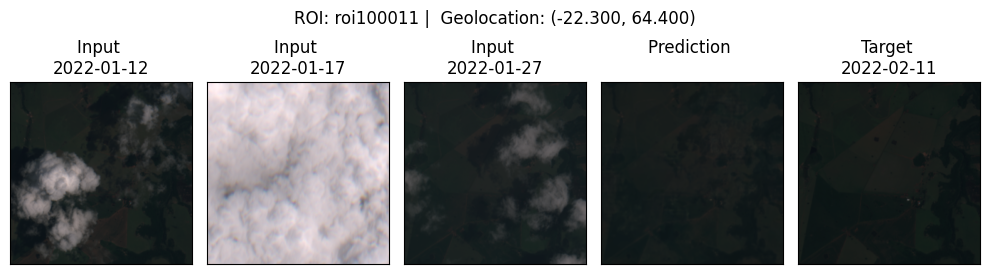

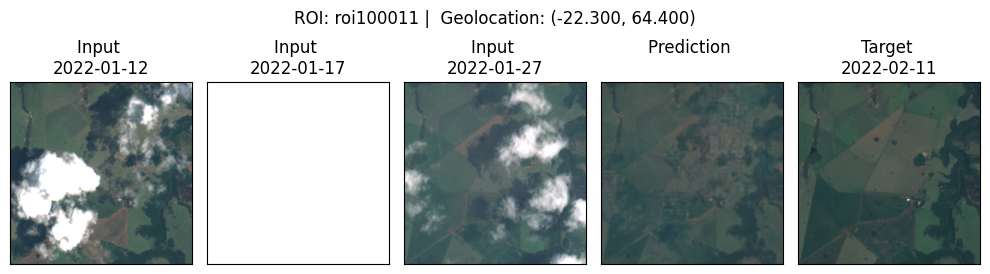

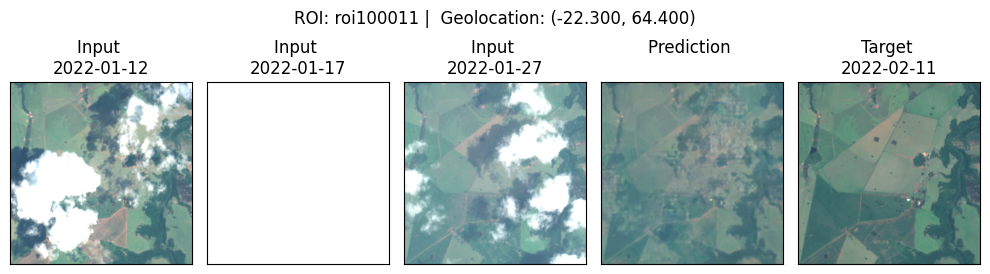

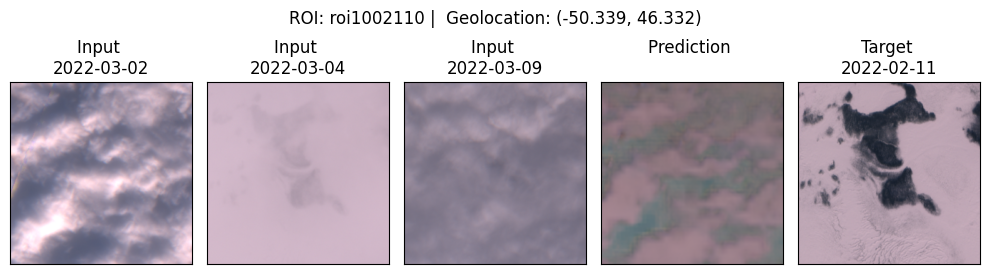

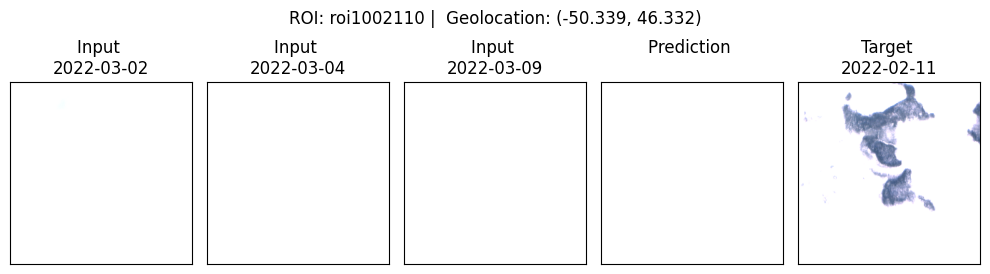

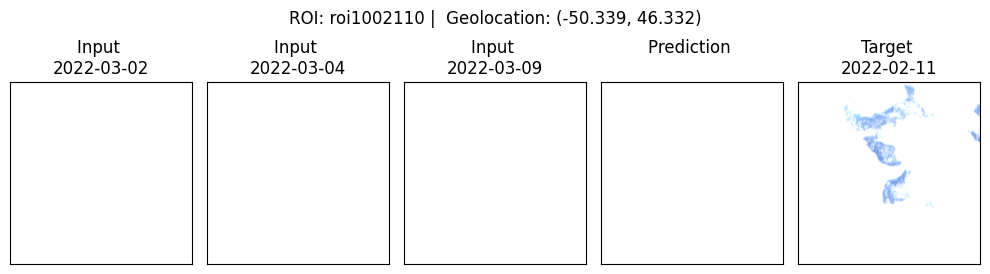

IndexError: list index out of range

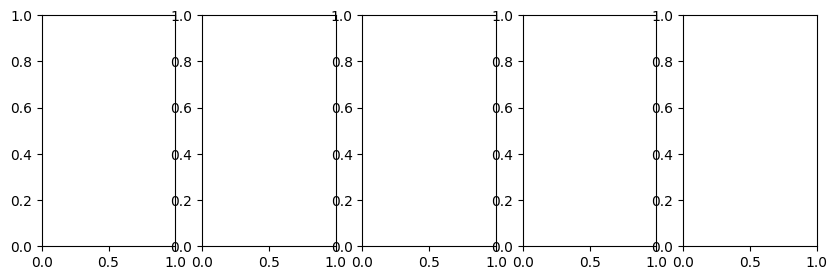

In [80]:
benchmark_visualization(inputs)

In [60]:
inputs["latlong"]

[tensor([-22.3000,  64.4000,  64.6000,  64.6000], dtype=torch.float64),
 tensor([ -50.3394,   46.3320, -122.8386,  -85.0421], dtype=torch.float64)]